In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utility import grangers_causation_matrix,granger_test,adf_test,kpss_test
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from scipy.stats import spearmanr,pearsonr
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.stattools import adfuller,kpss

sns.set_theme(style="whitegrid")

In [8]:
mins_played=pd.read_excel("Under21_minutes_played.xlsx",index_col=0)
all_teams=pd.read_excel("Under21_minutes_played_teams.xlsx",index_col=0)

In [9]:
mins_played["Minutes_played_italians"]=mins_played["Minutes_played_italians"]+mins_played["Minutes_played_oriundi"]

In [10]:
mins_played.drop(columns=["Minutes_played_oriundi"],inplace=True)
mins_played.tail()

,Minutes_played_under21,Minutes_played_italians,Minutes_played_foreigners,Fifa_points,Points_naz_u21,revenue
2018,8.221823,2.669724,5.552100,1.064686,1.350,5.489717
2019,6.539474,2.618820,3.920654,1.133279,2.555,6.272201
2020,6.049575,2.003721,4.045853,1.159438,3.000,5.480558
2021,5.818846,2.303961,3.514886,1.386975,2.475,5.337017
2022,6.184476,3.170920,3.013557,1.312050,1.750,3.891005


# Granger Casuality Test and CCN

In [11]:
grangers_causation_matrix(mins_played[['Minutes_played_under21','Minutes_played_italians','Minutes_played_foreigners','Fifa_points','Points_naz_u21','revenue']][27:-2], variables = mins_played[['Minutes_played_under21','Minutes_played_italians','Minutes_played_foreigners','Fifa_points','Points_naz_u21','revenue']][27:-2].columns)

,Minutes_played_under21_x,Minutes_played_italians_x,Minutes_played_foreigners_x,Fifa_points_x,Points_naz_u21_x,revenue_x
Minutes_played_under21_y,1.0000,0.5880,0.5880,0.0285,0.2245,0.0022
Minutes_played_italians_y,0.4130,1.0000,0.4130,0.0041,0.0389,0.0836
Minutes_played_foreigners_y,0.2737,0.2737,1.0000,0.5093,0.0010,0.0008
Fifa_points_y,0.0738,0.4442,0.2491,1.0000,0.0504,0.1093
Points_naz_u21_y,0.2435,0.0255,0.0691,0.1597,1.0000,0.0676
revenue_y,0.0000,0.2739,0.0003,0.5133,0.0000,1.0000


## FifaPoints and Minutes_played_italians

In [12]:
adf_test(mins_played[["Minutes_played_italians","Fifa_points"]][26:])

,Minutes_played_italians,Fifa_points
Test statistic,-2.8789,-3.2954
p-value,0.0479,0.0151
Critical value - 1%,-3.6791,-3.6889
Critical value - 5%,-2.9679,-2.9720
Critical value - 10%,-2.6232,-2.6253


In [13]:
kpss_test(mins_played[["Minutes_played_italians","Fifa_points"]][26:],3)

,Minutes_played_italians,Fifa_points
Test statistic,0.4013,0.1454
p-value,0.0766,0.1000
Critical value - 1%,0.7390,0.7390
Critical value - 5%,0.4630,0.4630
Critical value - 10%,0.3470,0.3470


In [14]:
from statsmodels.tsa.stattools import ccf
#ccf(mins_played["Points_naz_u21"][22:],mins_played["Minutes_played_italians"][22:],adjusted=False)
cross_corr_ita_fifa=ccf(mins_played["Fifa_points"][26:],mins_played["Minutes_played_italians"][26:],adjusted=True)
corr_pearson_ita_fifa=pearsonr(mins_played["Fifa_points"][26:],mins_played["Minutes_played_italians"][26:],alternative='greater')
print(f"Peason Correlation: {round(corr_pearson_ita_fifa.statistic,4)}, P-value {round(corr_pearson_ita_fifa.pvalue,4)}")
print(f"Correlation Minutes_played_italians e Fifa_points Lag 0: {round(cross_corr_ita_fifa[0],5)}")
print(f"Correlation Minutes_played_italians e Fifa_points Lag 1: {round(cross_corr_ita_fifa[1],4)}")
print(f"Correlation Minutes_played_italians e Fifa_points Lag 2: {round(cross_corr_ita_fifa[2],4)}")
#crea una tabella con i valori di cross correlation


corr_spearman_ita_nazu21=pearsonr(mins_played["Fifa_points"][27:-2],mins_played["Minutes_played_italians"][27:-2])
corr_spearman_ita_nazu21_lag1=pearsonr(mins_played["Fifa_points"][27:-2],mins_played["Minutes_played_italians"][26:-2].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=pearsonr(mins_played["Fifa_points"][27:-2],mins_played["Minutes_played_italians"][25:-2].shift(2).dropna())


print(f"Spearman Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")


Peason Correlation: 0.0261, P-value 0.4456
Correlation Minutes_played_italians e Fifa_points Lag 0: 0.0261
Correlation Minutes_played_italians e Fifa_points Lag 1: 0.0176
Correlation Minutes_played_italians e Fifa_points Lag 2: 0.0238
Spearman Correlation: -0.0195, P-value 0.9231
Lag1 Correlation: 0.007, P-value 0.9722
Lag2 Correlation: 0.0814, P-value 0.6864


In [15]:
granger_test(mins_played[['Fifa_points','Minutes_played_italians']][26:],4,2,"Fifa_points and Minutes played by Italian U21 players from 1993")

---------------------------------------------------------------------------------------------------------
Grenger Causality Test Results for: Fifa_points and Minutes played by Italian U21 players from 1993 
---------------------------------------------------------------------------------------------------------
   Lag  Test Statistic   P-value
1  1.0        1.093067  0.578953
2  2.0        1.220757  0.748030
3  3.0        2.092111  0.718822


## Iteration over ccf

In [16]:
corr_spearman_ita_nazu21=spearmanr(mins_played["revenue"][28:],mins_played["Minutes_played_under21"][28:])
corr_spearman_ita_nazu21_lag1=spearmanr(mins_played["revenue"][28:],mins_played["Minutes_played_italians"][27:].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=spearmanr(mins_played["revenue"][28:],mins_played["Minutes_played_italians"][26:].shift(2).dropna())


print(f"Peason Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")


for i in range(len(mins_played[26:-15])):
    corr_shift_1=pearsonr(mins_played["revenue"][26+i:],mins_played["Minutes_played_under21"][25+i:].shift(1).dropna(),alternative='two-sided')
    corr_shift_2=pearsonr(mins_played["revenue"][26+i:],mins_played["Minutes_played_under21"][24+i:].shift(2).dropna(),alternative='two-sided')
    corr_shift_3=pearsonr(mins_played["revenue"][26+i:],mins_played["Minutes_played_under21"][23+i:].shift(3).dropna(),alternative='two-sided')

    #corr=pearsonr(mins_played["revenue"][26+i:],mins_played["Minutes_played_under21"][26+i:],alternative='two-sided')
    #if corr_shift>corr:
    #print(f"{26 + i}  corr {corr.statistic},corr_shift_1 {corr_shift_1.statistic},corr_shift_2 {corr_shift_2.statistic}, corr_shift_3 {corr_shift_3.statistic}")

Peason Correlation: 0.3333, P-value 0.083
Lag1 Correlation: -0.237, P-value 0.2246
Lag2 Correlation: -0.4313, P-value 0.0219


## Points national team  u21 and Minutes_played_italians

In [17]:
adf_test(mins_played[["Minutes_played_italians","Points_naz_u21","Fifa_points"]][26:])

,Minutes_played_italians,Points_naz_u21,Fifa_points
Test statistic,-2.8789,-4.5535,-3.2954
p-value,0.0479,0.0002,0.0151
Critical value - 1%,-3.6791,-3.6791,-3.6889
Critical value - 5%,-2.9679,-2.9679,-2.9720
Critical value - 10%,-2.6232,-2.6232,-2.6253


In [18]:
kpss(mins_played["Points_naz_u21"][30:])

(0.37357565899492545,
 0.08854497457115282,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [19]:
kpss_test(mins_played[["Minutes_played_italians","Points_naz_u21","Fifa_points"]][26:-1],3)

,Minutes_played_italians,Points_naz_u21,Fifa_points
Test statistic,0.4337,0.3955,0.1436
p-value,0.0626,0.0791,0.1000
Critical value - 1%,0.7390,0.7390,0.7390
Critical value - 5%,0.4630,0.4630,0.4630
Critical value - 10%,0.3470,0.3470,0.3470


In [20]:

cross_corr_ita_nazu21=ccf(mins_played["Points_naz_u21"][26:],mins_played["Minutes_played_italians"][26:],adjusted=True)
corr_pearson_ita_nazu21=pearsonr(mins_played["Points_naz_u21"][26:],mins_played["Minutes_played_italians"][26:],alternative='greater')
print("Cross correlation between Italian U21 players and National Team U21 Points")
print("--------------------------------------------------------------------------------------------")
print(f"Peason Correlation: {round(corr_pearson_ita_nazu21.statistic,4)}, P-value {round(corr_pearson_ita_nazu21.pvalue,4)}")
print(f"Correlation Minutes_played_italians e Points_naz_u21 Lag 0: {round(cross_corr_ita_nazu21[0],4)}")
print(f"Correlation Minutes_played_italians e Points_naz_u21 Lag 1: {round(cross_corr_ita_nazu21[3],4)}")
print(f"Correlation Minutes_played_italians e Points_naz_u21 Lag 2: {round(cross_corr_ita_nazu21[1],4)}")


print("--------------------------------------------------------------------------------------------")

corr_spearman_ita_nazu21=spearmanr(mins_played["Points_naz_u21"][24:-2],mins_played["Minutes_played_italians"][24:-2])
corr_spearman_ita_nazu21_lag1=spearmanr(mins_played["Points_naz_u21"][24:-2],mins_played["Minutes_played_italians"][23:-2].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=spearmanr(mins_played["Points_naz_u21"][24:-2],mins_played["Minutes_played_italians"][22:-2].shift(2).dropna())


print(f"Spearman Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")




Cross correlation between Italian U21 players and National Team U21 Points
--------------------------------------------------------------------------------------------
Peason Correlation: 0.4264, P-value 0.0094
Correlation Minutes_played_italians e Points_naz_u21 Lag 0: 0.4264
Correlation Minutes_played_italians e Points_naz_u21 Lag 1: 0.2931
Correlation Minutes_played_italians e Points_naz_u21 Lag 2: 0.2027
--------------------------------------------------------------------------------------------
Spearman Correlation: 0.566, P-value 0.0011
Lag1 Correlation: 0.4133, P-value 0.0232
Lag2 Correlation: 0.3897, P-value 0.0333


In [21]:
granger_test(mins_played[['Points_naz_u21','Minutes_played_italians']][26:],5,3,"Points_naz_u21 and Minutes played by Italian U21 players from 1993")

---------------------------------------------------------------------------------------------------------
Grenger Causality Test Results for: Points_naz_u21 and Minutes played by Italian U21 players from 1993 
---------------------------------------------------------------------------------------------------------
   Lag  Test Statistic   P-value
1  1.0       12.867615  0.004932
2  2.0       13.344389  0.009710
3  3.0       11.957117  0.035380


In [22]:
test_result=grangercausalitytests(mins_played[['Points_naz_u21','Minutes_played_italians']][28:-1],maxlag=5,verbose=False)
#create a dataframe with the results of the granger causality test
test_result_df=pd.DataFrame(columns=['Lag','Test Statistic','P-value'])
for i in range(3,6):
    test_result_df.loc[i-1]=[i-1,test_result[i][0]['ssr_chi2test'][0],test_result[i][0]['ssr_chi2test'][1]]
print("Grenger Causality Test Results for: Points_naz_u21 and Minutes played by Italian U21 players")
print(test_result_df)

Grenger Causality Test Results for: Points_naz_u21 and Minutes played by Italian U21 players
   Lag  Test Statistic   P-value
2  2.0       12.867615  0.004932
3  3.0       13.344389  0.009710
4  4.0       11.957117  0.035380


## Revenue and Minutes_played_under21

In [23]:
adf_test(mins_played[["Minutes_played_under21","revenue"]][29:])

,Minutes_played_under21,revenue
Test statistic,-3.3542,-3.8396
p-value,0.0126,0.0025
Critical value - 1%,-3.7112,-3.8893
Critical value - 5%,-2.9812,-3.0544
Critical value - 10%,-2.6301,-2.6670


In [24]:
kpss_test(mins_played[["Minutes_played_under21","revenue"]][29:],0)

,Minutes_played_under21,revenue
Test statistic,0.3673,0.3944
p-value,0.0912,0.0796
Critical value - 1%,0.7390,0.7390
Critical value - 5%,0.4630,0.4630
Critical value - 10%,0.3470,0.3470


In [25]:
from statsmodels.tsa.stattools import ccf

cross_corr=ccf(mins_played["revenue"][29:],mins_played["Minutes_played_under21"][29:],adjusted=True)
corr_pearson_ita_fifa=pearsonr(mins_played["revenue"][29:],mins_played["Minutes_played_under21"][29:],alternative='two-sided')
print("Cross correlation between U21 players and Profit")
print("--------------------------------------------------------------------------------------------")
print(f"Peason Correlation: {round(corr_pearson_ita_fifa.statistic,4)}, P-value {round(corr_pearson_ita_fifa.pvalue,4)}")
print(f"Correlation Minutes_played_under21 e Entrate Lag 0: {round(cross_corr[0],4)}")
print(f"Correlation Minutes_played_under21 e Entrate Lag 1: {round(cross_corr[1],4)}")
print(f"Correlation Minutes_played_under21 e Entrate Lag 2: {round(cross_corr[3],4)}")
print("--------------------------------------------------------------------------------------------")

Cross correlation between U21 players and Profit
--------------------------------------------------------------------------------------------
Peason Correlation: 0.324, P-value 0.0992
Correlation Minutes_played_under21 e Entrate Lag 0: 0.324
Correlation Minutes_played_under21 e Entrate Lag 1: 0.4178
Correlation Minutes_played_under21 e Entrate Lag 2: 0.1756
--------------------------------------------------------------------------------------------


In [26]:
granger_test(mins_played[['revenue','Minutes_played_under21']][29:],4,2,"Revenue and Minutes played by U21 players from 1996")

---------------------------------------------------------------------------------------------------------
Grenger Causality Test Results for: Revenue and Minutes played by U21 players from 1996 
---------------------------------------------------------------------------------------------------------
   Lag  Test Statistic   P-value
1  1.0       10.303745  0.005789
2  2.0       13.644901  0.003431
3  3.0       21.863761  0.000213


<Axes: >

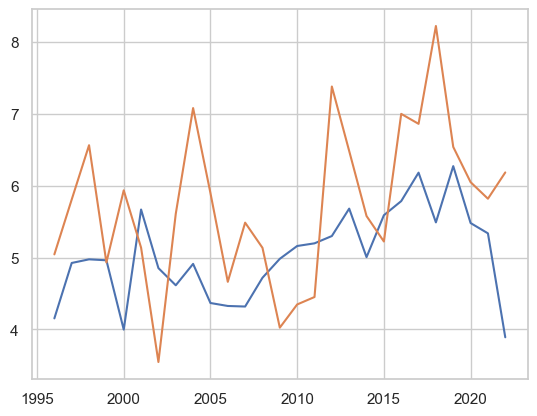

In [27]:
mins_played["revenue"][29:].plot()
mins_played["Minutes_played_under21"][29:].plot()


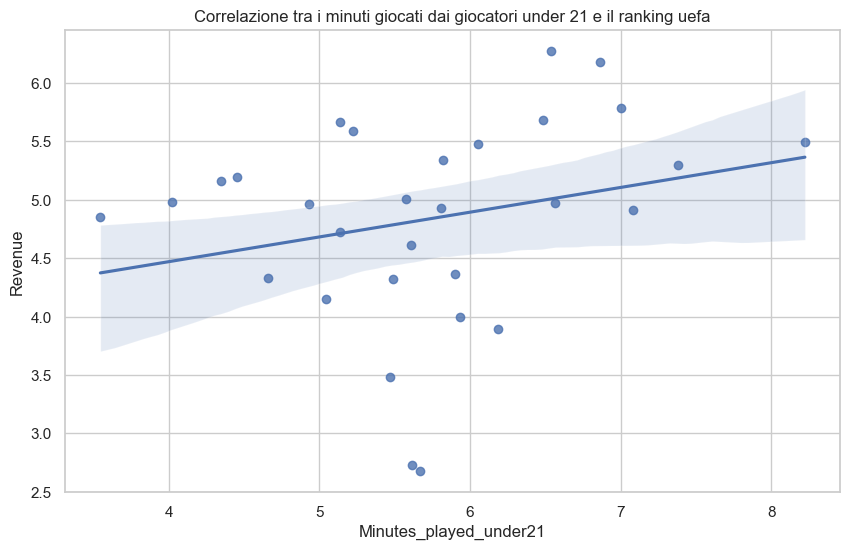

In [28]:
#stampa il grafico della correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa come retta di regressione
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(x=mins_played["Minutes_played_under21"], y=mins_played["revenue"])
plt.xlabel("Minutes_played_under21")
plt.ylabel("Revenue")
plt.title("Correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa")
plt.show()



In [62]:
#fai la OLS regression tra i minuti giocati dai giocatori under 21 e il ranking uefa
import statsmodels.api as sm

X = mins_played["Minutes_played_under21"][29:-1]
y = mins_played["revenue"][29:-1]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     4.112
Date:                Thu, 07 Mar 2024   Prob (F-statistic):             0.0538
Time:                        20:09:46   Log-Likelihood:                -20.655
No. Observations:                  26   AIC:                             45.31
Df Residuals:                      24   BIC:                             47.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

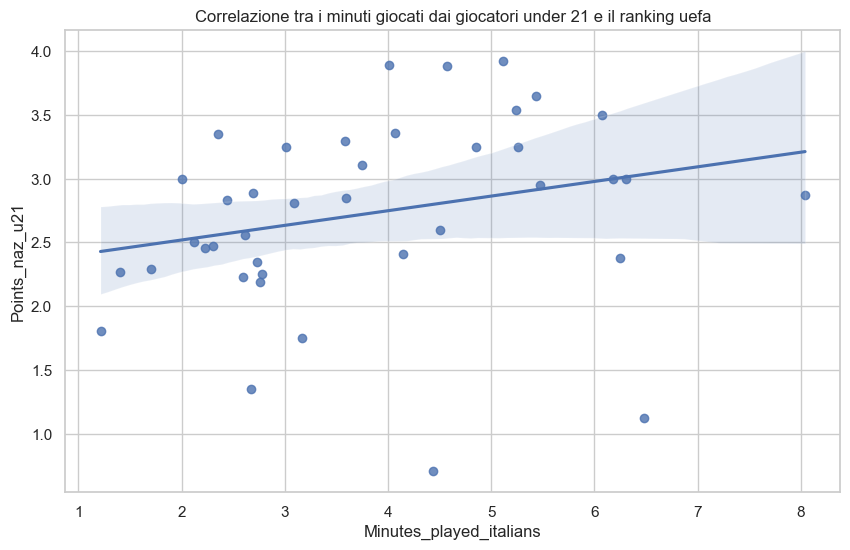

In [42]:
#stampa il grafico della correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa come retta di regressione
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(x=mins_played["Minutes_played_italians"], y=mins_played["Points_naz_u21"])
plt.xlabel("Minutes_played_italians")
plt.ylabel("Points_naz_u21")
plt.title("Correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa")
plt.show()


In [50]:
#fai la OLS regression tra i minuti giocati dai giocatori under 21 e il ranking uefa
import statsmodels.api as sm

X = mins_played["Minutes_played_italians"][25:-1]
y = mins_played["Points_naz_u21"][25:-1]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Points_naz_u21   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     9.018
Date:                Thu, 07 Mar 2024   Prob (F-statistic):            0.00558
Time:                        20:08:08   Log-Likelihood:                -28.919
No. Observations:                  30   AIC:                             61.84
Df Residuals:                      28   BIC:                             64.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     